# **Analysis on Titanic Dataset**
# **Date: 26th July 2025**
# **Technologies Used: Python, NumPy, Pandas, Matplotlib, Seaborn**

## -o) Import libraries

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm

## -o) Dateset Merging

In [35]:
# d1 = pd.read_csv('train.csv')
# d2 = pd.read_csv('test.csv')
# d3 = pd.read_csv('gender_submission.csv')
# concate_data = pd.merge(d2,d3 , on='PassengerId' , how='outer')
# df = pd.concat([d1,concate_data], axis=0)
# df.to_csv('titanic.csv', index=False)

## -o) Load dataset

In [36]:
df = pd.read_csv("titanic.csv")



## -o) Basic Information for Understanding Data

In [37]:
# Check Data Set Loaded Successfully!
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
# Inspect data size, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [39]:
# Check Stats of Data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [40]:
# Dulpiate Data
print('Duplicate Data : ',df.duplicated().sum()) 


Duplicate Data :  0


In [41]:
null_columns = df.isnull().sum()
print(null_columns[null_columns.values != 0].index)

Index(['Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')


In [42]:
# - Check columns like Store, Temperature,	Fuel_Price,	MarkDown1,	MarkDown2,	MarkDown3,	MarkDown4,	MarkDown5,	CPI,	Unemployment, ...
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [43]:
# Missing values in each column
print(df.isnull().sum())

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [44]:
print('Total Numbers of Rows : ',df.shape[0])
print('Total Numbers of Colume : ',df.shape[1])

Total Numbers of Rows :  1309
Total Numbers of Colume :  12


## -o) Data Cleaning

In [45]:
# Handle the missing values?
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.drop(['Cabin'],axis=1,inplace=True)
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df.dropna(subset='Embarked',inplace=True)
print('Now Data becomes clean......')
print(df.isnull().sum())

Now Data becomes clean......
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [46]:
# Which column needs a data type change and why?
# Column (Age) because this column having decimal number
df['Age'] = df['Age'].astype(int)
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


## -o) Data visualizations

## **Questions:**
---


### What is the ratio of survived to not survived passengers?
> Pie plot (Survived and not Survived).



---

### What was the survival rate based on gender?
> Bar plot (Survived Count and Gender).




---



### What was the survival rate based on passenger class (Pclass)?
> Bar plot (Survived Count and Passenger Class).

---



### What was the effect of age on survival?
> Heatmap plot (Age and Survived).


In [47]:
# In order to avoid warnings in the output (Use this library only after completing the whole code)
import warnings
warnings.filterwarnings("ignore")
# matplotlib font warnings specific hide karne ke liye:
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

In [50]:
# How many total passengers are there in the dataset?
total_passenger = df['PassengerId'].count()
print('Total Number of Passengers on ship are :',total_passenger)

Total Number of Passengers on ship are : 1307


In [51]:
# What is the ratio of survived to not survived passengers?
s_vs_ns = df['Survived'].value_counts()
not_survived = s_vs_ns[0] / total_passenger * 100
survived = s_vs_ns[1] / total_passenger * 100
print('Survived ratio is',int(round(survived,0)))
print('Not Survived ratio is',int(round(not_survived,0)))

Survived ratio is 38
Not Survived ratio is 62


In [52]:
# What was the survival rate based on gender?
print('Gender Wise Survival Rate ')
# print(df.groupby(['Sex','Survived'])['Survived'].count())  non_efficient step for this question
survival_rate = df.groupby('Sex')['Survived'].sum()
print(survival_rate) # my smart step for this question

Gender Wise Survival Rate 
Sex
female    383
male      109
Name: Survived, dtype: int64


In [53]:
# What was the survival rate based on passenger class (Pclass)?
print('Passenger class Survival Rate')
p_survival = df.groupby('Pclass')['Survived'].sum()
print(p_survival)

Passenger class Survival Rate
Pclass
1    184
2    117
3    191
Name: Survived, dtype: int64


In [54]:
# What was the effect of age on survival?
print(df[['Age','Survived']].corr())
print("Negative Correlation indicate that if age less then survival chances are very high as compared to high age person")

               Age  Survived
Age       1.000000 -0.049057
Survived -0.049057  1.000000
Negative Correlation indicate that if age less then survival chances are very high as compared to high age person


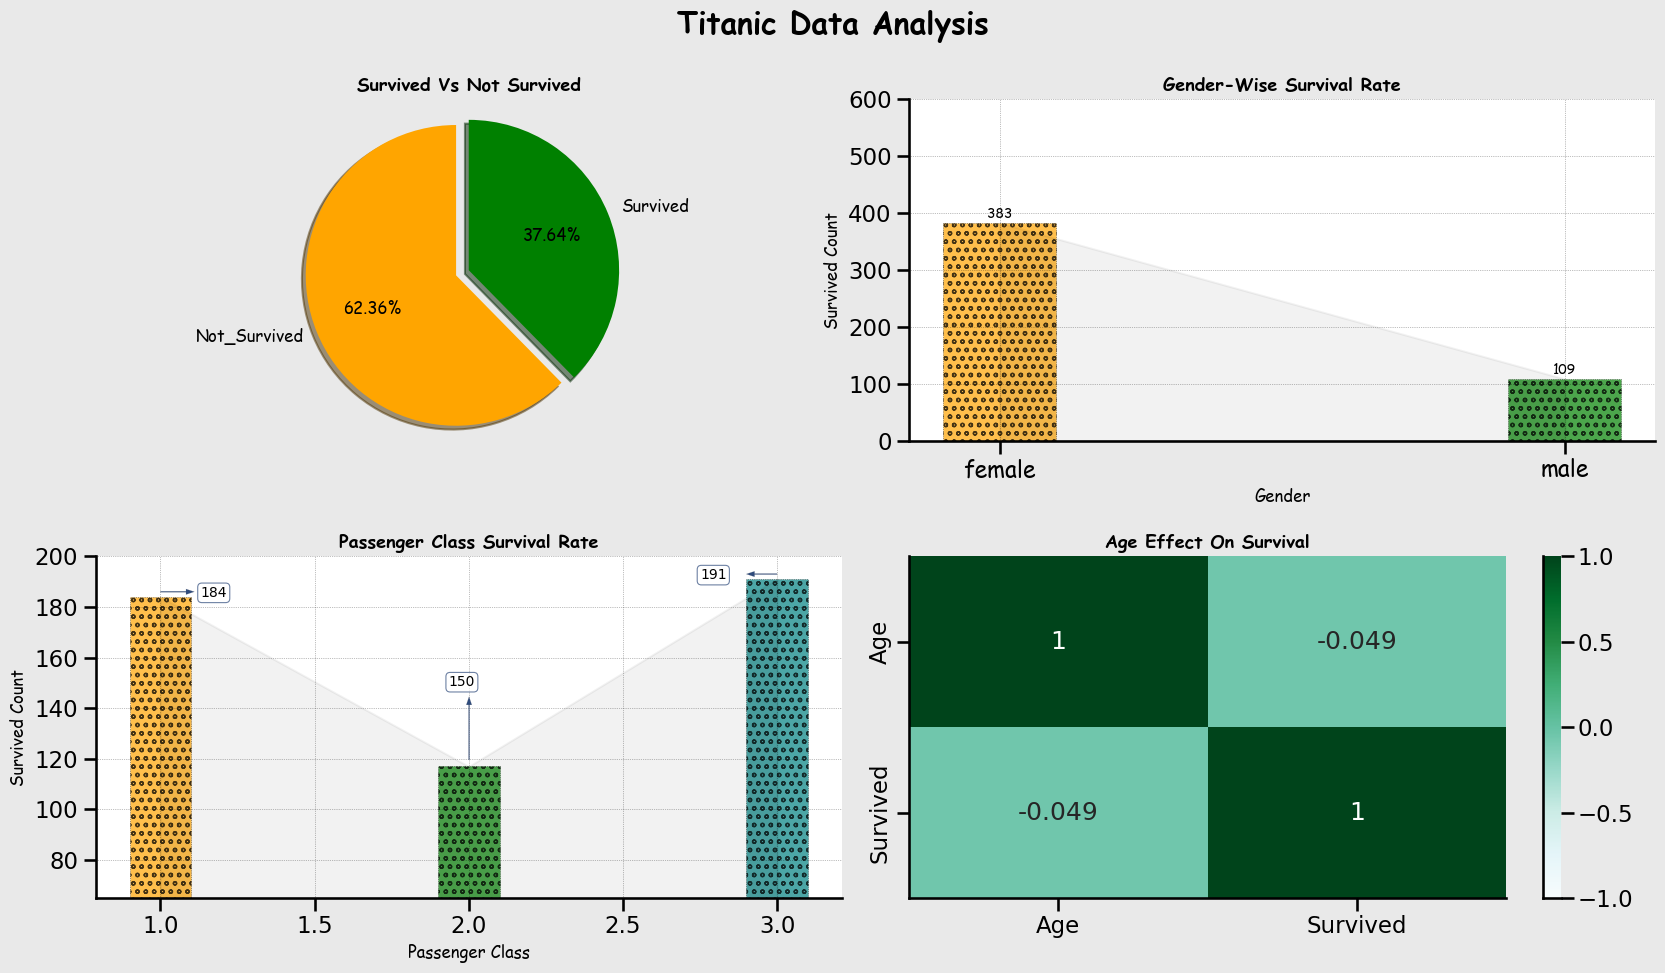

In [55]:
# What is the ratio of survived to not survived passengers?
s_vs_ns = df['Survived'].value_counts()
not_survived = s_vs_ns[0] / total_passenger * 100
survived = s_vs_ns[1] / total_passenger * 100

fig,ax = plt.subplots(2,2,figsize = (17, 10) ,facecolor="#E9E9E9" ) 
sns.set_context('talk')
plt.suptitle('Titanic Data Analysis',fontweight = 700 , fontfamily = 'cursive')

ax[0][0].set_title('Survived Vs Not Survived',fontsize = 13 , fontweight = 600 , fontfamily = 'cursive')
ax[0][0].pie([not_survived,survived],textprops={'fontsize' : 12 , 'fontweight' : 500 ,'fontfamily' : 'cursive', 'color' : "#000000"},radius = 1.1,startangle = 90 ,counterclock=True,labels=['Not_Survived' , 'Survived'] ,shadow=True , colors=['orange','green'], explode=[0.1,0] , autopct='%.2f%%')




# What was the survival rate based on gender?
# print(df.groupby(['Sex','Survived'])['Survived'].count())  non_efficient step for this question
survival_rate = df.groupby('Sex')['Survived'].sum()
ax[0][1].set_title('Gender-Wise Survival Rate',fontsize = 13 , fontweight = 600 , fontfamily = 'cursive')
ax[0][1].set_xlabel('Gender',fontsize = 12 , fontweight = 500 ,fontfamily = 'cursive', color = "#000000")
ax[0][1].set_ylabel('Survived Count',fontsize = 12 , fontweight = 500 ,fontfamily = 'cursive', color = "#000000")
ax[0][1].set_ylim(0,600)
bars = ax[0][1].bar(survival_rate.index , survival_rate.values,width = 0.2,alpha=0.7, hatch='oo',color =['orange','green'],edgecolor = 'black',linewidth = 0.5,linestyle = ':')
for bar in bars:
    yval = bar.get_height()
    ax[0][1].text(bar.get_x() + bar.get_width()/2, yval + 9 , yval, ha='center',fontsize = 10,fontfamily = 'cursive')
ax[0][1].set_xticklabels(survival_rate.index, fontfamily='cursive')
ax[0][1].grid(linestyle = ":" , linewidth = 0.5 , color = 'black' , alpha = 0.5)
ax[0][1].fill_between(survival_rate.index,survival_rate.values , alpha = 0.05 , color = 'black')


# What was the survival rate based on passenger class (Pclass)?
p_survival = df.groupby('Pclass')['Survived'].sum()

ax[1][0].set_title('Passenger Class Survival Rate',fontsize = 13 , fontweight = 600 , fontfamily = 'cursive')
ax[1][0].set_xlabel('Passenger Class',fontsize = 12 , fontweight = 500 ,fontfamily = 'cursive', color = "#000000")
ax[1][0].set_ylabel('Survived Count',fontsize = 12 , fontweight = 500 ,fontfamily = 'cursive', color = "#000000")
ax[1][0].set_ylim(65,200)
ax[1][0].bar(p_survival.index , p_survival.values,width = 0.2,alpha=0.7, hatch='oo',color =['orange','green','#008080'],edgecolor = 'black',linewidth = 0.5,linestyle = ':')
ax[1][0].grid(linestyle = ":" , linewidth = 0.5 , color = 'black' , alpha = 0.5)
ax[1][0].fill_between(p_survival.index,p_survival.values , alpha = 0.05 , color = 'black')
ax[1][0].text(2.75,191,'191',fontsize = 10,bbox = {
    'facecolor' : 'white', 'edgecolor' : '#2f4b7c','alpha' : 0.7,'linewidth' : 0.8,'boxstyle': 'round,pad=0.2,rounding_size=0.3'
})
ax[1][0].annotate('' ,xy=(2.9,193) , xytext=(3,193) ,arrowprops={   
    'facecolor' : '#2f4b7c', 'shrink' : 0 , 'edgecolor' : 'grey','linewidth' : 0.1 , 'headwidth': 4,'headlength': 6,'width': 0.7})


ax[1][0].text(1.13,184,'184',fontsize = 10,bbox = {
    'facecolor' : 'white', 'edgecolor' : '#2f4b7c','alpha' : 0.7,'linewidth' : 0.8,'boxstyle': 'round,pad=0.2,rounding_size=0.3'
})
ax[1][0].annotate('' ,xy=(1.11,186) , xytext=(1,186) ,arrowprops={   
    'facecolor' : '#2f4b7c', 'shrink' : 0 , 'edgecolor' : 'grey','linewidth' : 0.1 , 'headwidth': 4,'headlength': 6,'width': 0.7})

ax[1][0].text(1.935,148.7,'150',fontsize = 10,bbox = {
    'facecolor' : 'white', 'edgecolor' : '#2f4b7c','alpha' : 0.7,'linewidth' : 0.8,'boxstyle': 'round,pad=0.2,rounding_size=0.3'
})
ax[1][0].annotate('' ,xy=(2.001,144.6) , xytext=(2.001,119.6) ,arrowprops={   
    'facecolor' : '#2f4b7c', 'shrink' : 0 , 'edgecolor' : 'grey','linewidth' : 0.1 , 'headwidth': 4,'headlength': 6,'width': 0.7})


# What was the effect of age on survival?
ax[1][1].set_title('Age Effect On Survival',fontsize = 13 , fontweight = 600 , fontfamily = 'cursive')
sns.heatmap(data = df[['Age','Survived']].corr() ,annot=True, cmap='BuGn' ,vmax=1,vmin=-1)



sns.despine()
plt.tight_layout()
plt.savefig('Titanic_EDA.png',dpi=500)
plt.show()
